In [87]:
from math import floor
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [88]:
def parse_json(filename):
    mag_list = [0 for i in range(0,10)]

    # Open the JSON file
    file = open(filename, 'r')

    # Read the file contents
    json_data = file.read()

    # Parse the JSON data
    data = json.loads(json_data)

    for eq in data['features']:
        mag = eq['properties']['mag']
        mag_list[floor(mag)] += 1
    
    return mag_list        

In [117]:
# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

def best_exp(MRI):
    x_data = range(0,len(MRI))
    y_data = MRI

    # Perform the curve fitting
    params, _ = curve_fit(exponential_func, x_data, y_data)

    # Extract the optimized parameters
    a_opt, b_opt, c_opt = params
    
    # Generate the curve using the optimized parameters
    y_fit = exponential_func(x_data, a_opt, b_opt, c_opt)
    
    # Extrapolation: Predicting for new x values
    x_extrapolate = np.array(range(len(MRI), 10))
    y_extrapolate = exponential_func(x_extrapolate, a_opt, b_opt, c_opt)

    # Plot the original data points and the best fit curve
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, y_fit, label='Best Fit', color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
    return list(y_extrapolate)

In [130]:
def write_table(mag_list):
    avgs = [mag / 123 for mag in mag_list]
    MRI = [1 / a for a in avgs if a != 0]
    MRI += best_exp(MRI)
    will_occur = [1 if (a == 0 or 1 / a > 1) else (1 / a) for a in MRI]
    will_not =  [1-p for p in will_occur]
    next_30_yrs = [1 - p ** 30 for p in will_not]

    data = {
        'Name' : [f'{i}-{i}.9' for i in range(0, len(mag_list))],
        'Total # of EQs from 1900-Present' : mag_list,
        'Average EQs per year' : avgs,
        'MRI (in years)' : MRI,
        'Probability of an EQ per Year' : will_occur,
        'Probability of No EQ per Year' : will_not,
        'Probability of an EQ in the Next 30 Years' : next_30_yrs
    }

    df = pd.DataFrame(data)

    # Define custom CSS styles
    styles = [
        {"selector": "th", 
         "props": [("padding", "10px"),
                   ("padding-left","20px"),
                   ("text-align", "center"), 
                   ("background-color", "lightblue"), 
                   ("color", "black"), 
                   ("font-weight", "bold")]
        }
    ]
    
    # Define the CSS style for header cells
    header_style = "padding: 100px;"

    # Apply the style to the table headers
    styled_table = df.style.set_table_attributes('style="{}"'.format(header_style))

    # Apply the styles to the table
    styled_table = df.style.set_table_styles(styles)

    # Display the styled table
    display(styled_table)

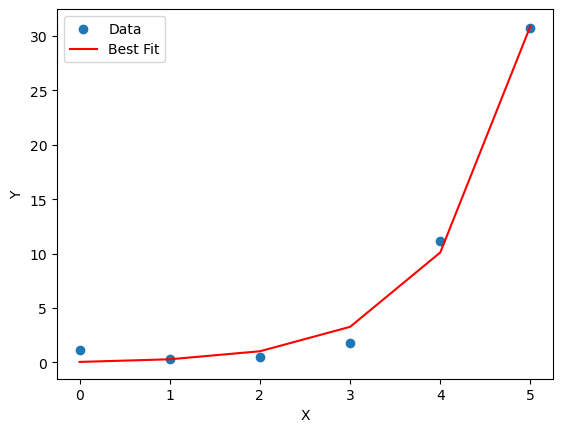

,Name,Total # of EQs from 1900-Present,Average EQs per year,MRI (in years),Probability of an EQ per Year,Probability of No EQ per Year,Probability of an EQ in the Next 30 Years
0,0-0.9,107,0.869919,1.149533,0.869919,0.130081,1.000000
1,1-1.9,440,3.577236,0.279545,1.000000,0.000000,1.000000
2,2-2.9,263,2.138211,0.467681,1.000000,0.000000,1.000000
3,3-3.9,69,0.560976,1.782609,0.560976,0.439024,1.000000
4,4-4.9,11,0.089431,11.181818,0.089431,0.910569,0.939829
5,5-5.9,4,0.032520,30.750000,0.032520,0.967480,0.629101
6,6-6.9,0,0.000000,94.352204,0.010599,0.989401,0.273600
7,7-7.9,0,0.000000,287.454525,0.003479,0.996521,0.099267
8,8-8.9,0,0.000000,875.401927,0.001142,0.998858,0.033708
9,9-9.9,0,0.000000,2665.552066,0.000375,0.999625,0.011194


In [131]:
if __name__ == "__main__":
    mag_list = parse_json("query.json")
    write_table(mag_list)